# Importation des bibliothèques nécessaires

In [14]:
%matplotlib inline
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Chargement du fichier de données

In [2]:
import pandas
data = pandas.read_csv( "train_cap2018.csv")
data.head()
result=data["level1"]

In [3]:
#purification 
#on remplace tous les nan de la base par des 0.0
data=data.fillna(0)

([<matplotlib.patches.Wedge at 0x7f799380f978>,
  <matplotlib.text.Text at 0x7f79937e3940>])

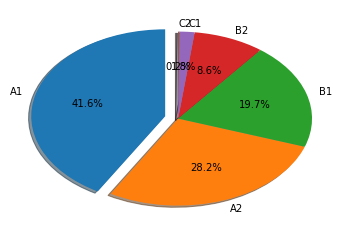

In [4]:
#visualisation
m=np.array(data["level1"]) 
liste=[0,0,0,0,0,0]
for i in range(len(m)):
    if(m[i]=="A1"):
        liste[0]+=1
    if(m[i]=="A2"):
        liste[1]+=1
    if(m[i]=="B1"):
        liste[2]+=1
    if(m[i]=="B2"):
        liste[3]+=1
    if(m[i]=="C1"):
        liste[4]+=1
    if(m[i]=="C2"):
        liste[5]+=1

explode=[0.10,0,0,0,0,0]
origin=["A1","A2","B1","B2","C1","C2"]
plt.pie(liste,explode=explode,labels=origin,autopct='%1.1f%%',shadow=True,startangle=90)


## remarque
on remarque que le nombre des personnes ayant le niveau C2 est très faible, ce nombre augmente de plus en plus qu'on s'éloigne du niveau le plus élevé


In [5]:
X = data.as_matrix()
y = data[['level1']].as_matrix().squeeze()
n = y.shape
taille=n[0]
for i in range(taille): 
    if(y[i]=="A1") :
        y[i]=1
    if(y[i]=="A2") :
        y[i]=2
    if(y[i]=="B1") :
        y[i]=3
    if(y[i]=="B2") :
        y[i]=4
    if(y[i]=="C1") :
        y[i]=5
    if(y[i]=="C2") :
        y[i]=6
print(y)
y = y.astype(np.float)

[6 6 6 ..., 1 1 1]


On retire la première colonne correspondant au full-text et la dernière colonne correspondant à l'étiquette
Normalisation des données numériques en divisant par l'écart-type

In [6]:
X = np.delete(X, len(X[0])-1, 1) # 1 ==> supprimer la 45ème collone, si ct 2=> supprimer la 45ème ligne
X = np.delete(X, 0, 1)
#X=X.astype(np.float)
print(X)



[[16 233 1116 ..., 0.59 24.3 146.62]
 [7 180 866 ..., 0.64 26.14 141.98]
 [10 180 861 ..., 0.72 35.15 62.96]
 ..., 
 [2 20 63 ..., 0.9 36.99 100.0]
 [5 27 107 ..., 0.85 29.42 137.17]
 [1 38 174 ..., 0.71 16.82 221.61]]


On calcule les plus proches voisins

In [7]:
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
np.isnan(X[0].any())#and gets False
np.isnan(y[0].any())
#np.isfinite(X.all()) #and gets True

False

In [8]:
# Créeons un `classifieur` qui calculera les 3 plus proches voisins d'un nouveau points
# en prenant des voisins parmi tous les exemples de X
classifieur = KNeighborsClassifier(n_neighbors=10).fit(X[:10],y[:10])
# Calcul de la prédiction pour les tuples de la matrice
print('prediction pour les dix premiers exemples avec k=10 est de X = ',classifieur.predict(X[:10]))

prediction pour les dix premiers exemples avec k=10 est de X =  [ 6.  6.  6.  6.  6.  6.  6.  6.  6.  6.]


### Explication
le classifieur a bien prédit que les 10 premières personnes présentes dans la base ont un niveau A2 avec comme nombre des plus proches voisins = 10

### quels arguments influent plus sur le résultat ?


[ 6.  6.  6. ...,  1.  1.  1.]


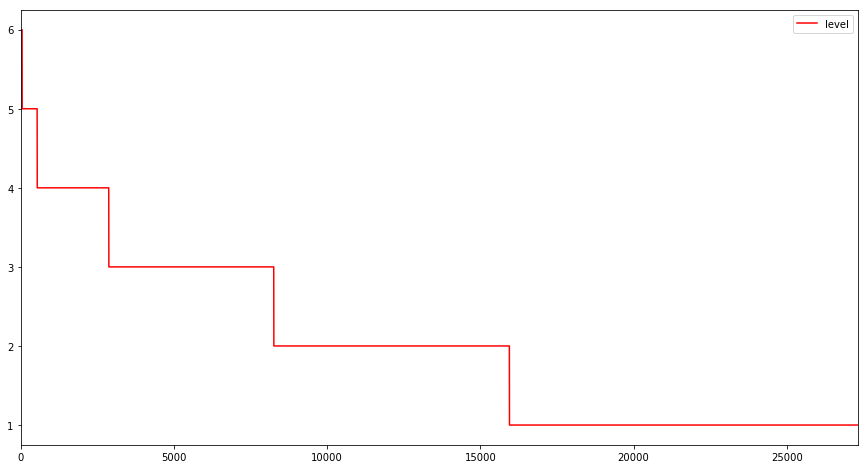

In [42]:
print(y)
fig= plt.subplots(figsize=(15, 8))
level=pandas.DataFrame(y)
level[0].plot(color='red', label='level')
plt.legend(loc='best');
plt.show()

[ 6.  6.  6. ...,  1.  1.  1.]


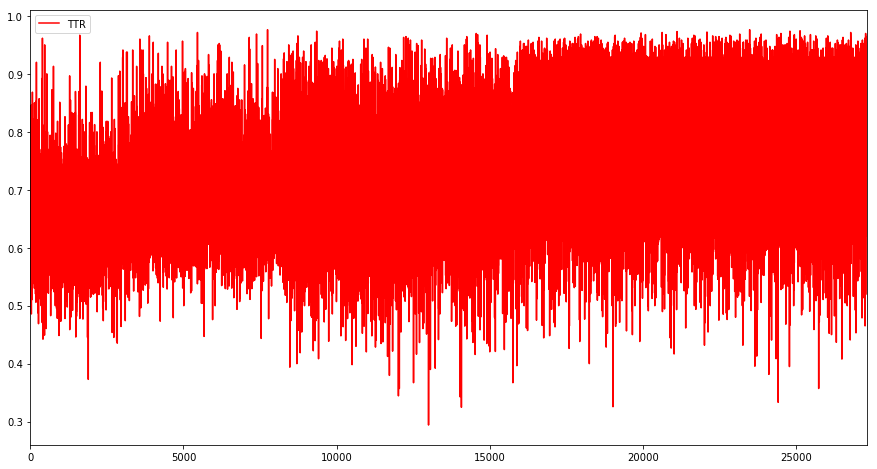

In [46]:
print(y)
fig= plt.subplots(figsize=(15, 8))
data["TTR"].plot(color='red', label='TTR')
plt.legend(loc='best');
plt.show()

#### pour comprendre l'impact d'un attribut sur le résultat final, on doit centrer les valeurs, on utilisera pour ça des valeurs centrées réduites

In [67]:
def variance(dataframe,colonne):
    tab=dataframe[colonne].as_matrix()
    moyenne=np.mean(tab)
    taille=len(dataframe)
    print("moyenne :",moyenne, "longueur:",taille)
    result=0
    for i in range(taille):
        inter=(tab[i]-moyenne)**2
        result+=inter 
    return result/n    
variance(data,"words")

moyenne : 69.5915781765 longueur: 27310


array([ 1735.98046368])

In [75]:
def ecart_type(dataframe,colonne):
    return np.sqrt(variance(dataframe,colonne))
ecart_type(data,"words")

moyenne : 69.5915781765 longueur: 27310


array([ 41.66509887])

In [90]:
def centre_red(var,moyenne,ecart):
    return (var-moyenne)/ecart


def coeff_corelation(dataframe,colonnex,colonney):
    tabx=dataframe[colonnex].as_matrix()
    taby=y.astype(np.int)
    
    moyenneX=np.mean(tabx)
    moyenneY=np.mean(y)
    
    print()
    print(tabx)
    taille=len(tabx)
    somme=0
    sx=np.sqrt(variance(dataframe,colonnex))
    sy=np.sqrt(variance(dataframe,colonney))
    
    
    for i in range (len(tabx)):
        somme+=tabx[i]*taby[i]
    return (somme-(taille*(moyenneX*moyenneY)))/((taille-1)*sx*sy) 

print(coeff_corelation(data,"words","level1"))

[6 6 6 ..., 1 1 1]

[233 180 180 ...,  20  27  38]
moyenne : 69.5915781765 longueur: 27310


TypeError: unsupported operand type(s) for /: 'str' and 'int'

# Fonction qui renvoit l'erreur empirique

In [ ]:
def calcul_erreur_empirique(X,y,k) :
    classifieur = KNeighborsClassifier(n_neighbors=k).fit(X,y)
    d = np.sum((classifieur.predict(X)!=y).astype(int))
    print(d)
    return d
calcul_erreur_empirique(X[:10],y[:10],3)


In [ ]:
def calcule_erreur(X_train,y_train,X_test,y_test,k) :
    classifieur = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
    calcul_erreur_empirique(X_test,y_test,k)

# Application de la régression linéaire

In [ ]:
import random

def g(z):
    "Numerically stable sigmoid function."
    if z >= 0:
        ez = np.exp(-z)
        return 1 / (1 + ez)
    else:
        # if x is less than zero then z will be small, denom can't be
        # zero because it's 1+z.
        ez = np.exp(z)
        return ez / (1 + ez)




def reg_lineaire(X,y,alpha,lambd):
    def gradient_l1(t,alpha,lambd):
        t2 = t - alpha*lambd*np.sign(t)
        t2[np.sign(t) != np.sign(t2)] = 0
        return t2
    
    n,d = X.shape
    theta = np.zeros(d)

    for t in range(1000):

        i = random.randint(0,n-1)
        xi = X[i]
        yi = y[i]
        h = g(np.dot( theta , xi ))
        #print(theta)
        #theta -= alpha*xi*(h-yi)+alpha*lambd*np.sign(theta)
        theta -= alpha*xi*(h-yi)
        theta = gradient_l1(theta,alpha,lambd)
    return theta
reg_lineaire(X,y,1,1)

# Application de la regression logistique

In [ ]:
def reg_lineaire(X,y,alpha,lambd):
    def gradient_l1(t,alpha,lambd):
        t2 = t - alpha*lambd*np.sign(t)
        t2[np.sign(t) != np.sign(t2)] = 0
        return t2
    
    n,d = X.shape
    theta = np.zeros(d)

    for t in range(1000):

        i = random.randint(0,n-1)
        xi = X[i]
        yi = y[i]
        h = g(np.dot( theta , xi ))
        #print(theta)
        #theta -= alpha*xi*(h-yi)+alpha*lambd*np.sign(theta)
        theta -= alpha*xi*(h-yi)
        theta = gradient_l1(theta,alpha,lambd)
    return theta

